In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') # Look Pretty
import pandas as pd
import numpy as np

# Load the Automobiles Dataset

In [3]:
auto_price = pd.read_csv('Automobile price data _Raw_.csv')

## Convert some columns to numeric values
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
auto_price[cols] = auto_price[cols].apply(pd.to_numeric, args=('coerce',))

## Remove rows with missing values
auto_price.dropna(axis = 0, inplace = True)

## Compute the log of the auto price
auto_price['lnprice'] = np.log(auto_price.price)

## Create a column with new levels for the number of cylinders
auto_price['num-cylinders'] = ['four-or-less' if x in ['two', 'three', 'four'] else 
    ('five-six' if x in ['five', 'six'] else 
    'eight-twelve') for x in auto_price['num-of-cylinders']]


print(auto_price.dtypes)
print(auto_price.shape)
auto_price.head(5)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
lnprice              float64
num-cylinders         object
dtype: object
(195, 28)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,lnprice,num-cylinders
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,9.510075,four-or-less
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,9.711116,four-or-less
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.711116,five-six
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.543235,four-or-less
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,9.767095,five-six


# Pair-Wise Scatter Plot

https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

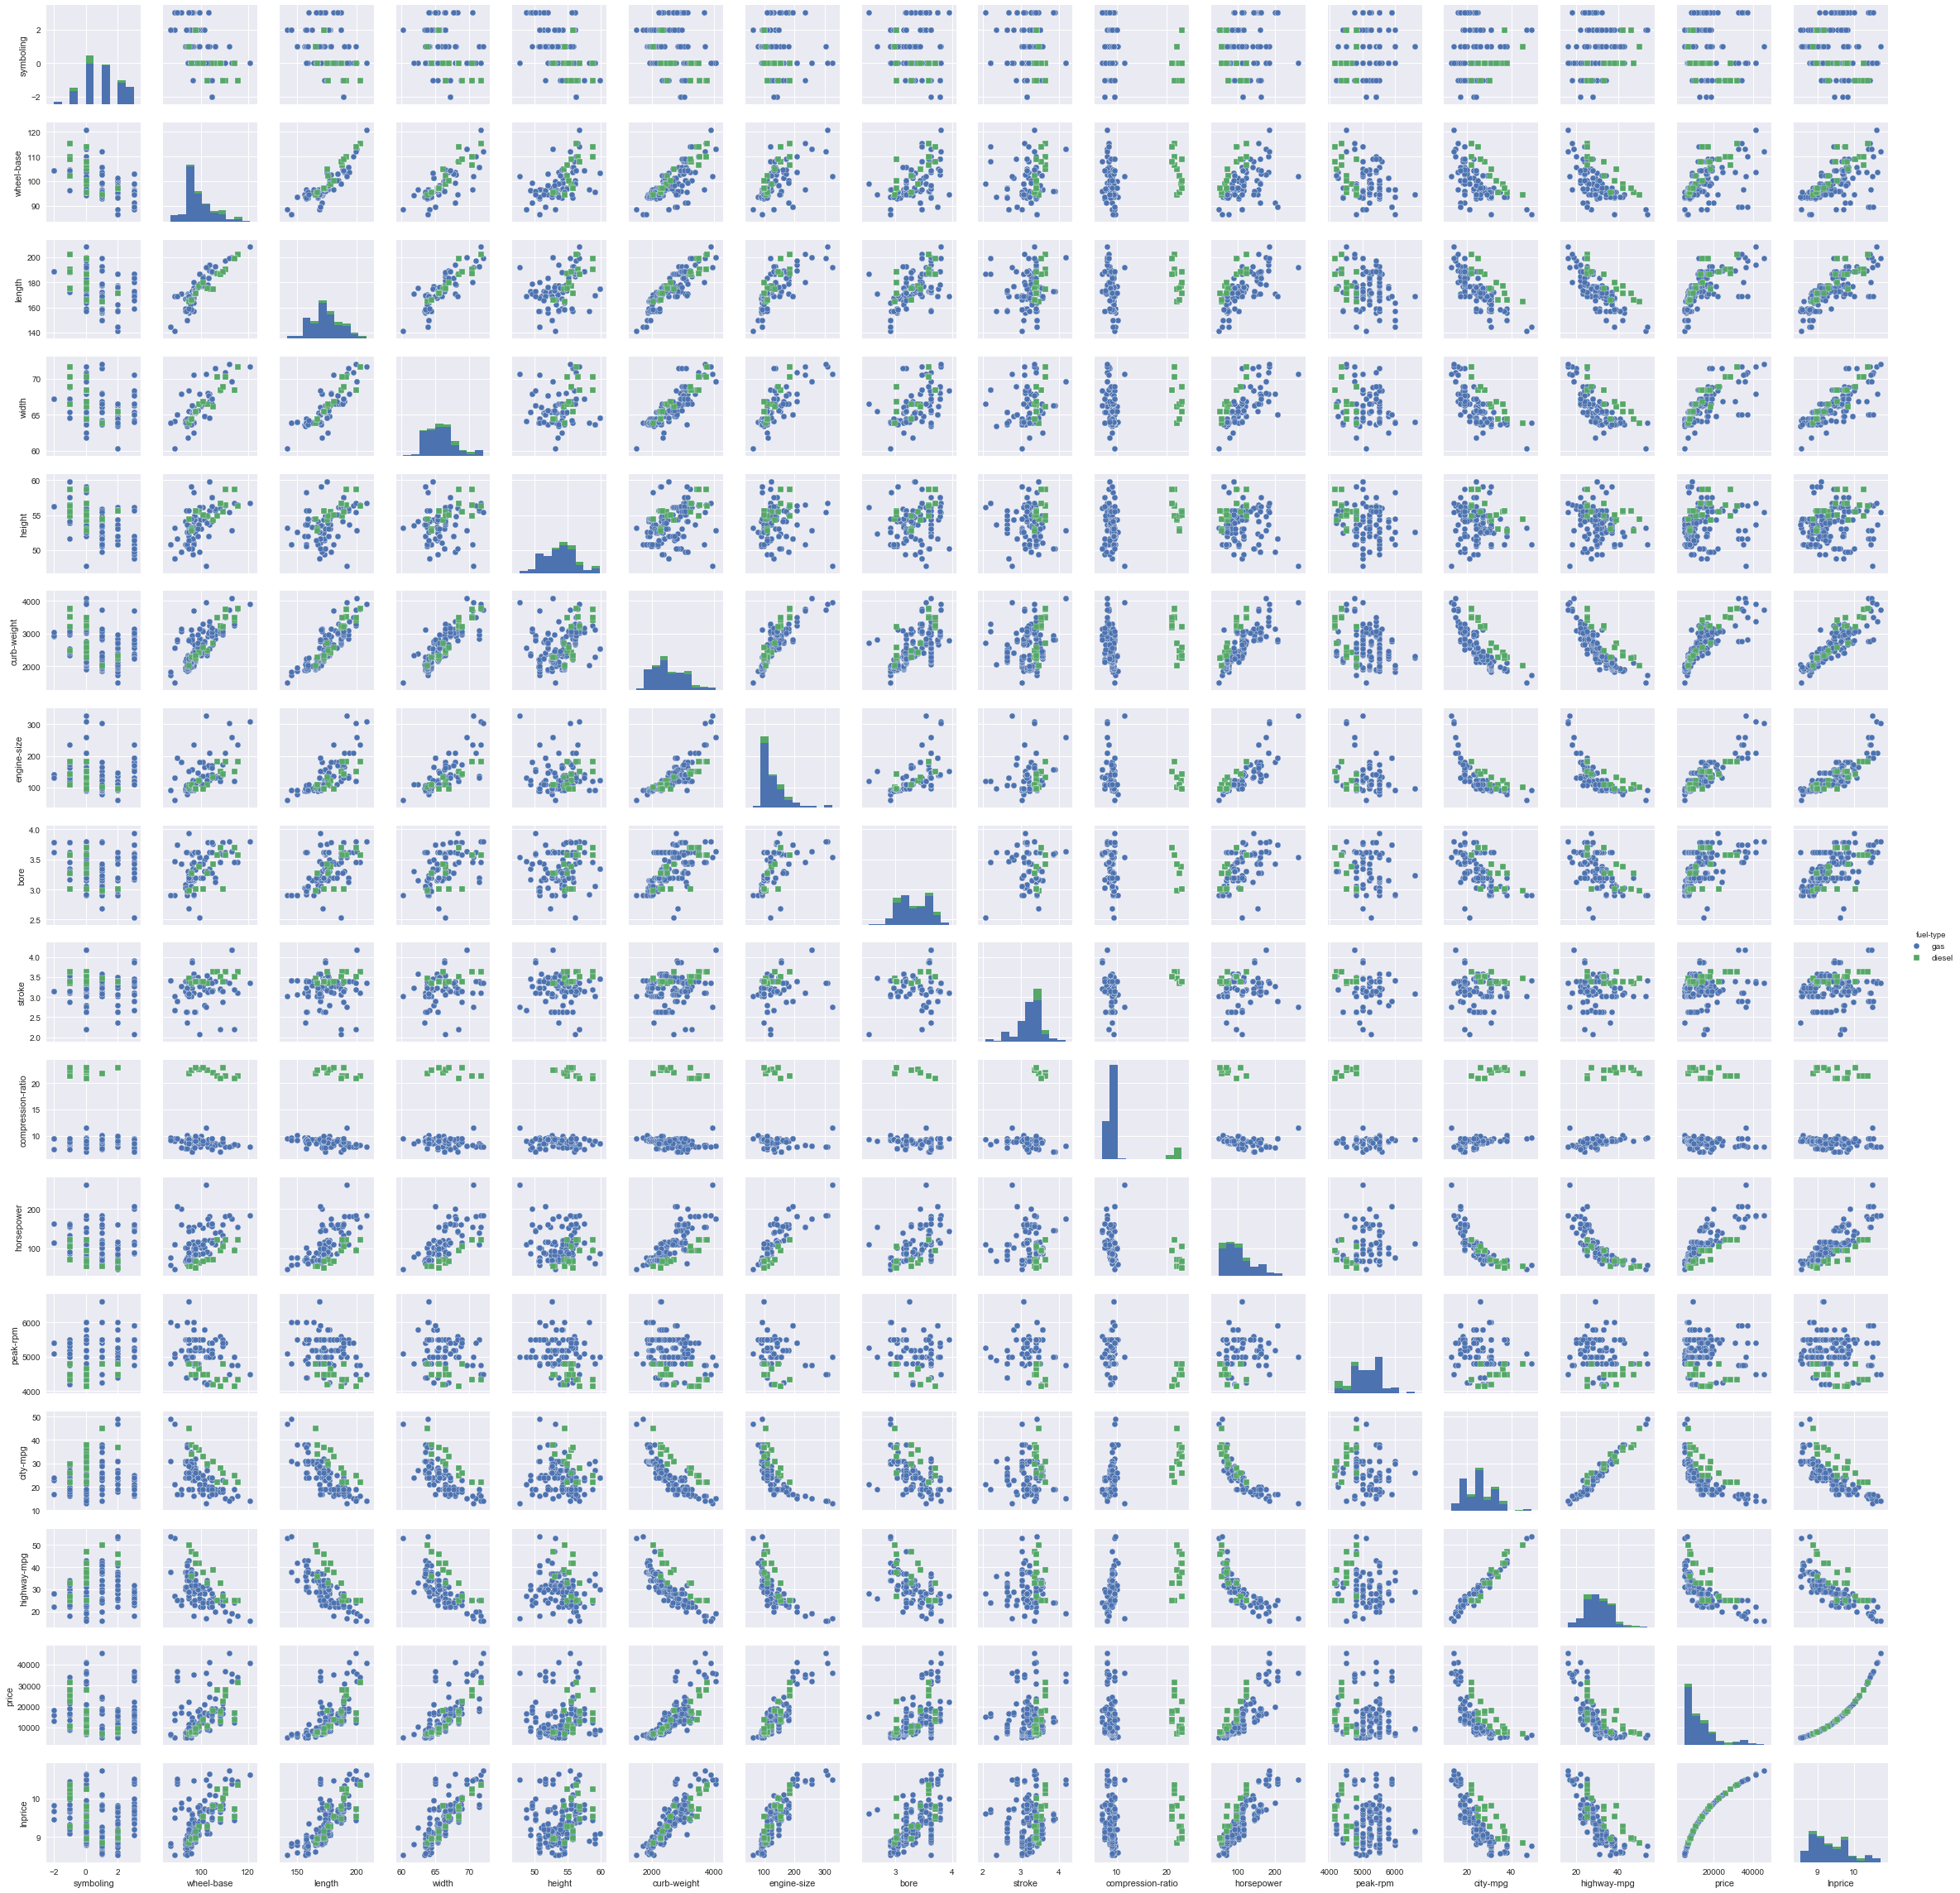

In [4]:
import seaborn as sns
sns.pairplot(auto_price, hue='fuel-type', markers=["o", "s"], dropna=True, size=2)

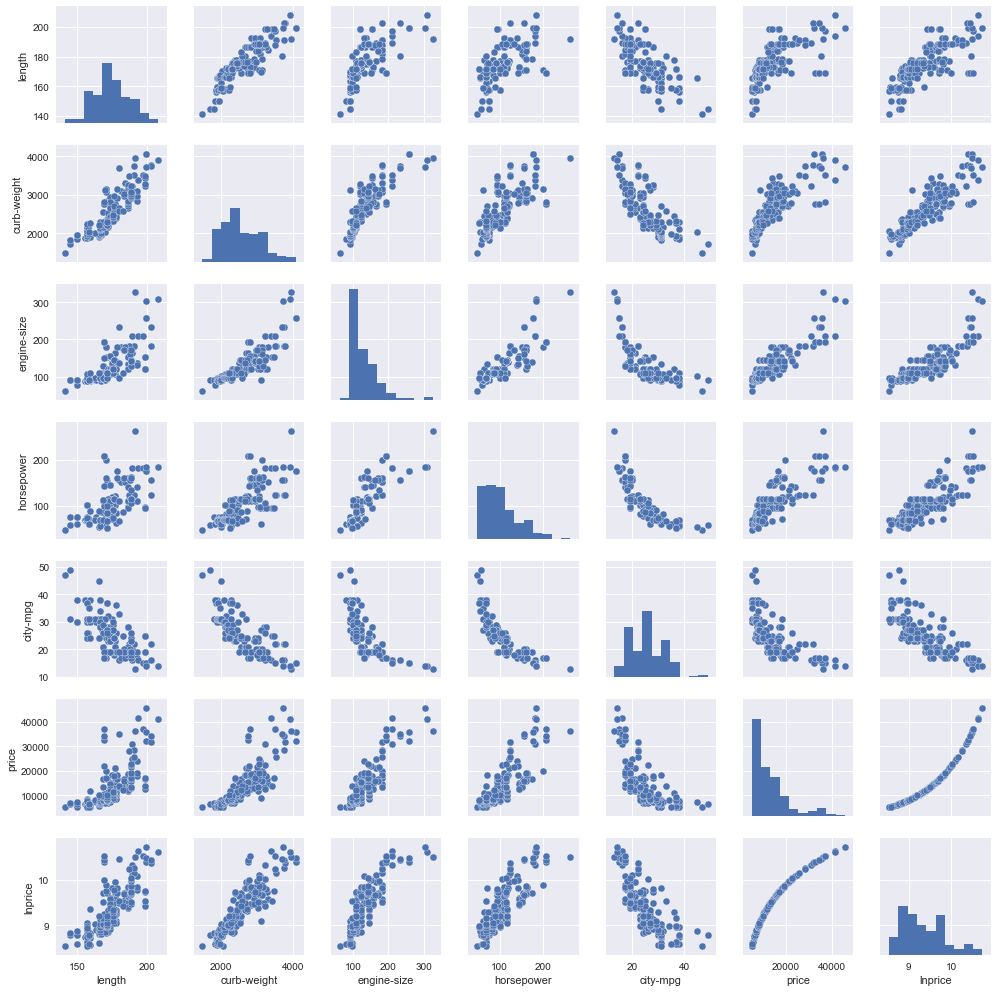

In [5]:
import seaborn as sns
num_cols = ["length", "curb-weight", "engine-size", "horsepower", "city-mpg", "price", "lnprice"] 
sns.pairplot(auto_price[num_cols], size=2)

# Conditioned Histograms

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

'drive-wheels'

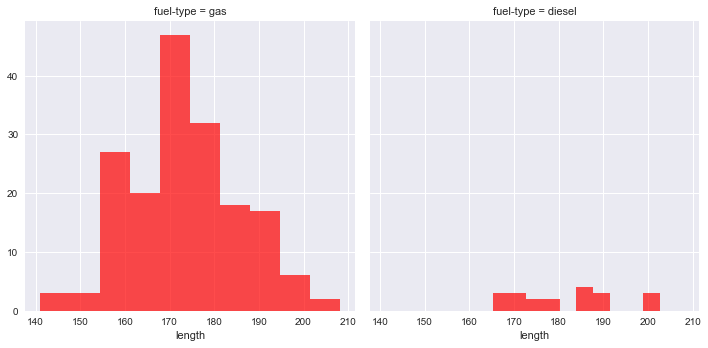

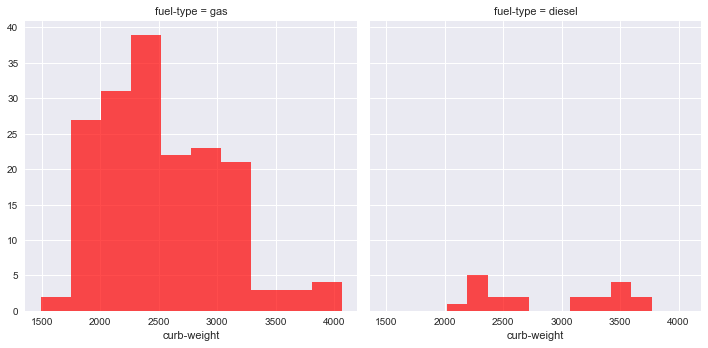

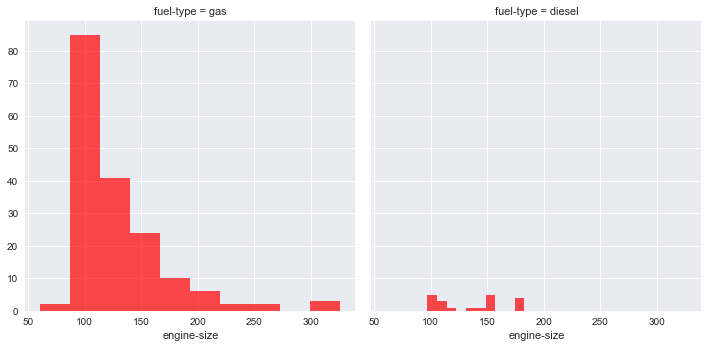

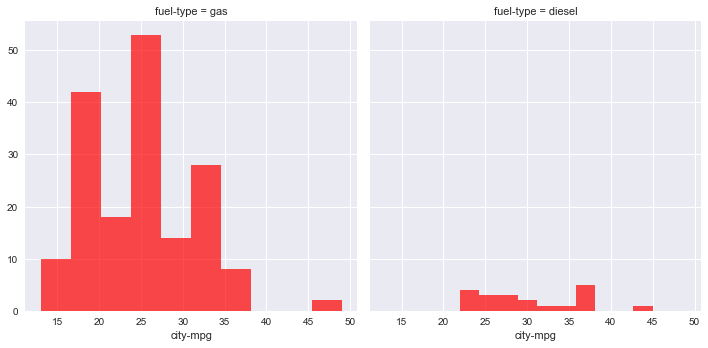

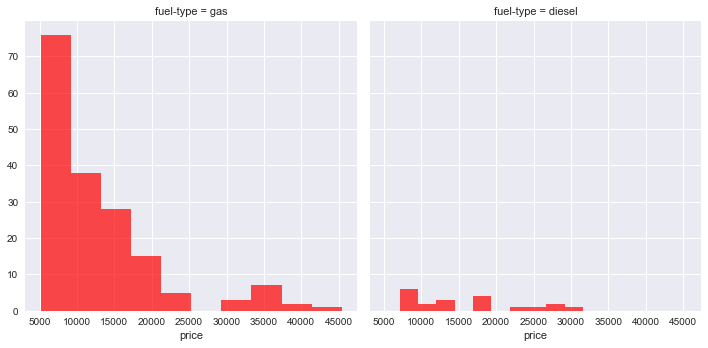

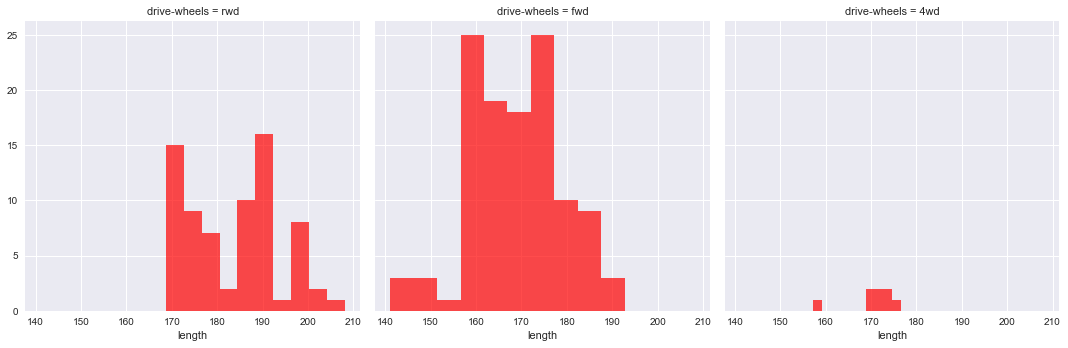

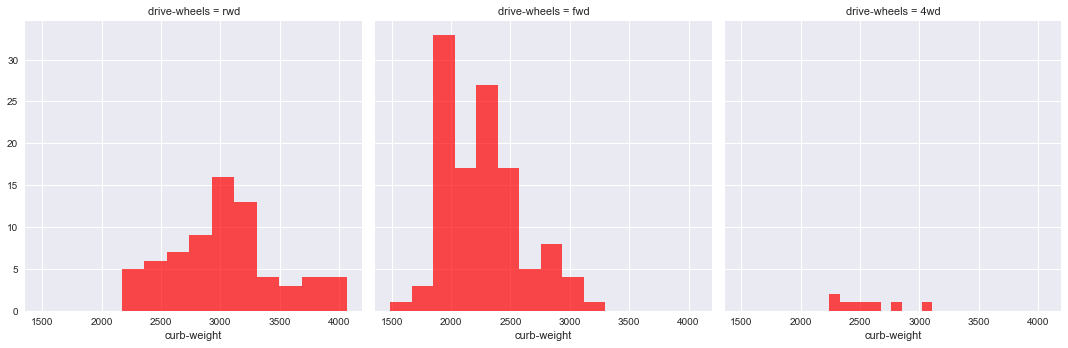

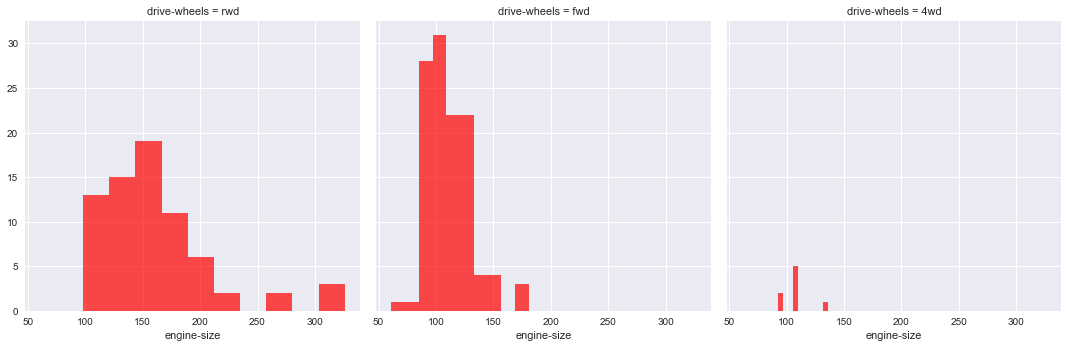

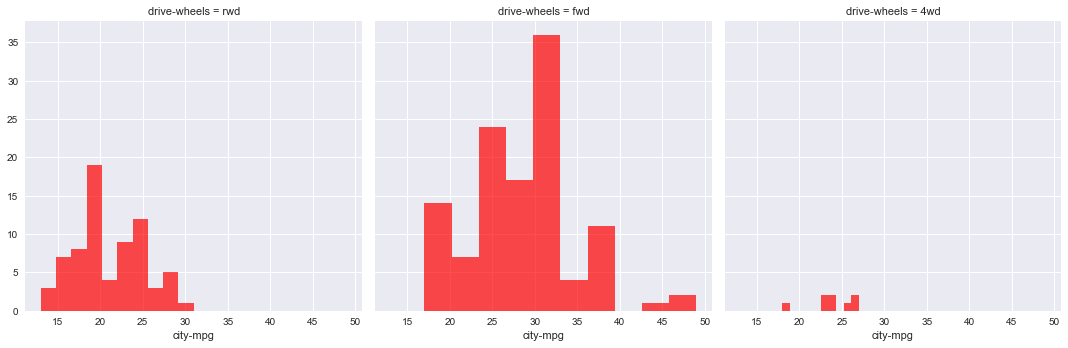

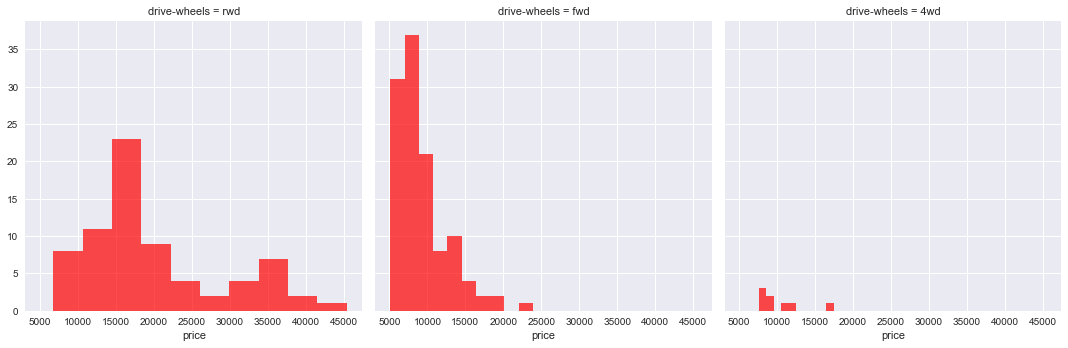

In [6]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid = sns.FacetGrid(df, col=grid_col, size=5, aspect=1)
        grid.map(plt.hist, col, color="r", alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols1 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg",
               "price"]

cond_hists(auto_price, plot_cols1, 'fuel-type')
cond_hists(auto_price, plot_cols1, 'drive-wheels')

# Box Plots

'drive-wheels'

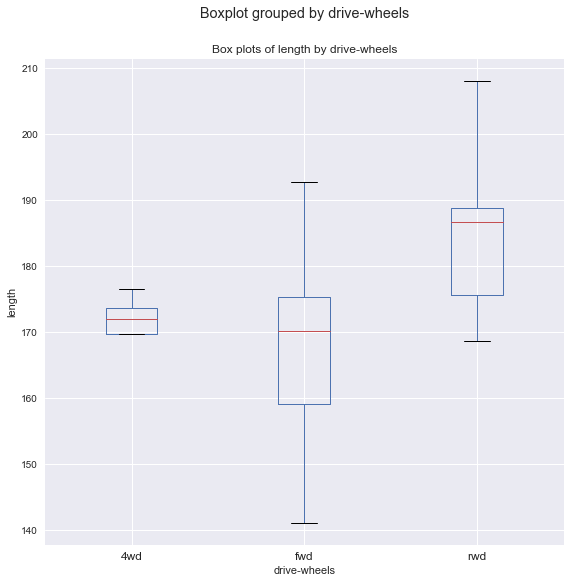

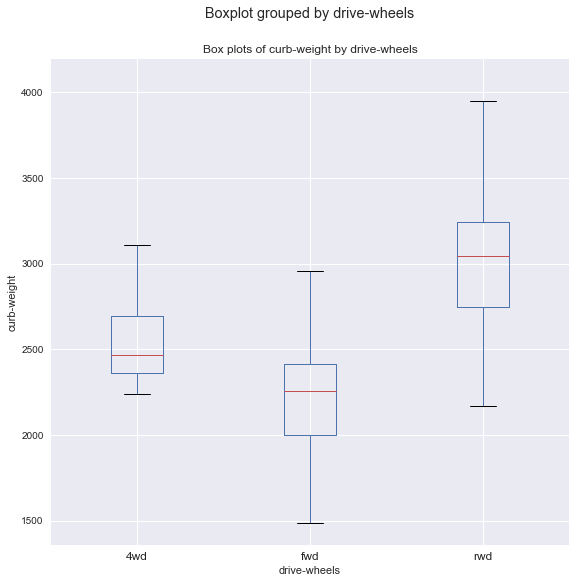

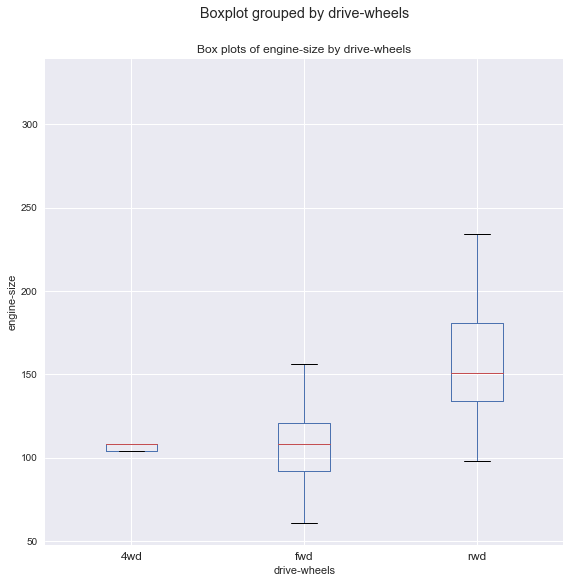

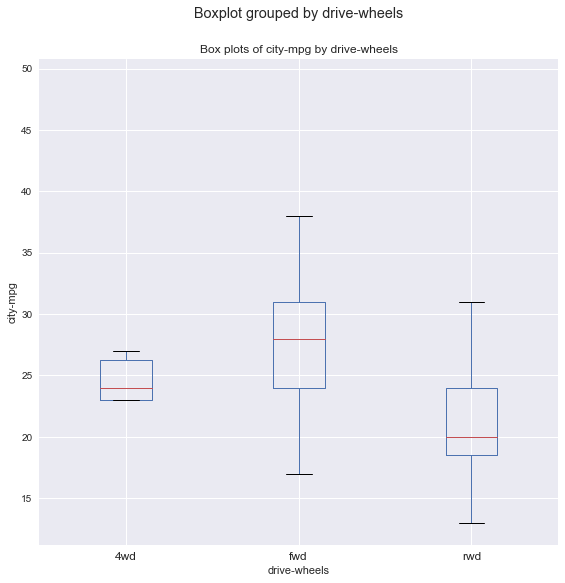

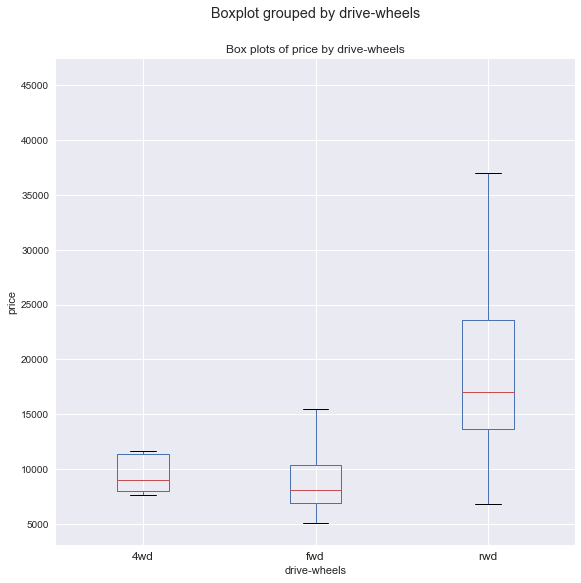

In [76]:
## Create boxplots of data
def group_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 9))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by 

## Define columns for making a conditioned histogram
plot_cols2 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg",
               "price"]

group_boxplot(auto_price, plot_cols2, "drive-wheels")

# Scatter Plots

['length', 'curb-weight', 'engine-size', 'city-mpg']

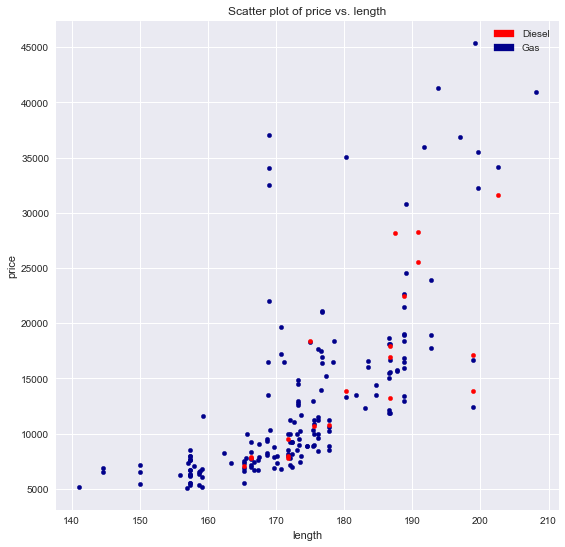

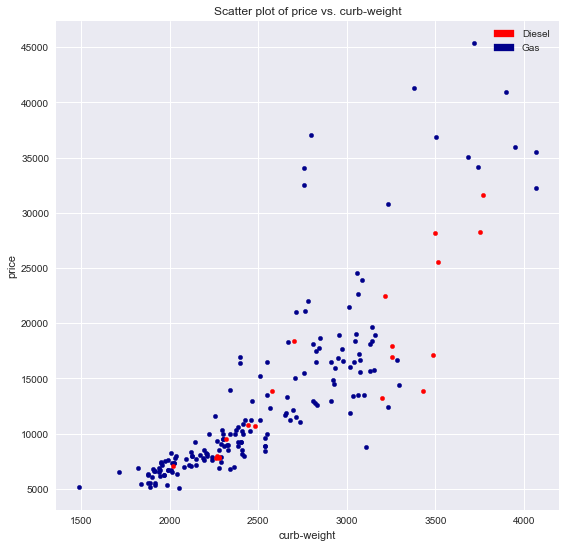

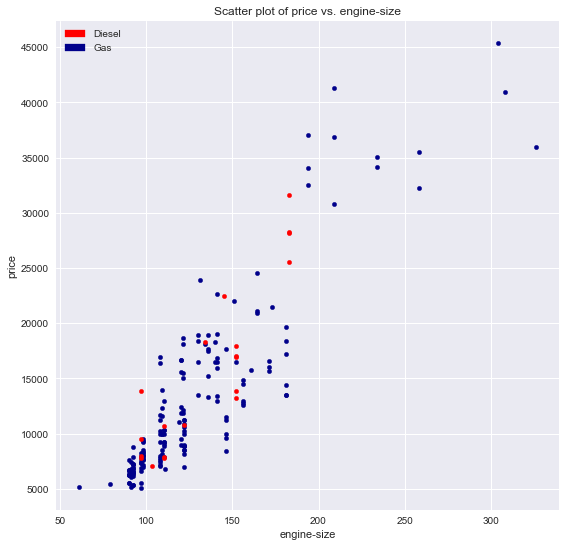

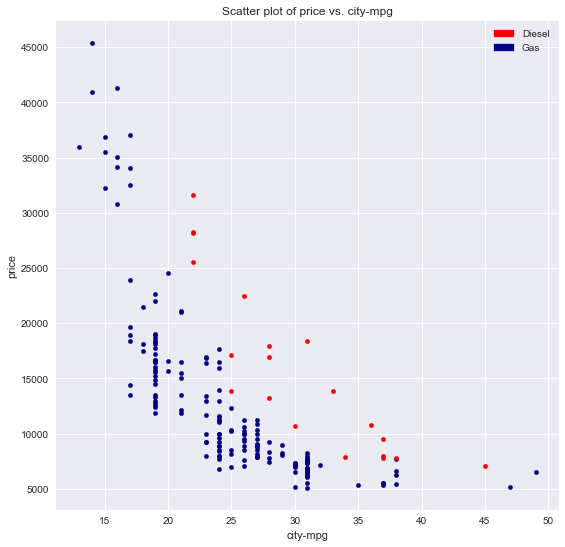

In [77]:
## Create scatter plot
def auto_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 9))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue')                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red') 
        ax.set_title('Scatter plot of price vs. ' + col)
        red_patch = mpatches.Patch(color='Red', label='Diesel')
        blue_patch = mpatches.Patch(color='DarkBlue', label='Gas') 
        plt.legend(handles=[red_patch, blue_patch])
    return plot_cols

## Define columns for making scatter plots
plot_cols3 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg"]

auto_scatter(auto_price, plot_cols3)

# Conditioned Scatter Plots

C:\ProgramData\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


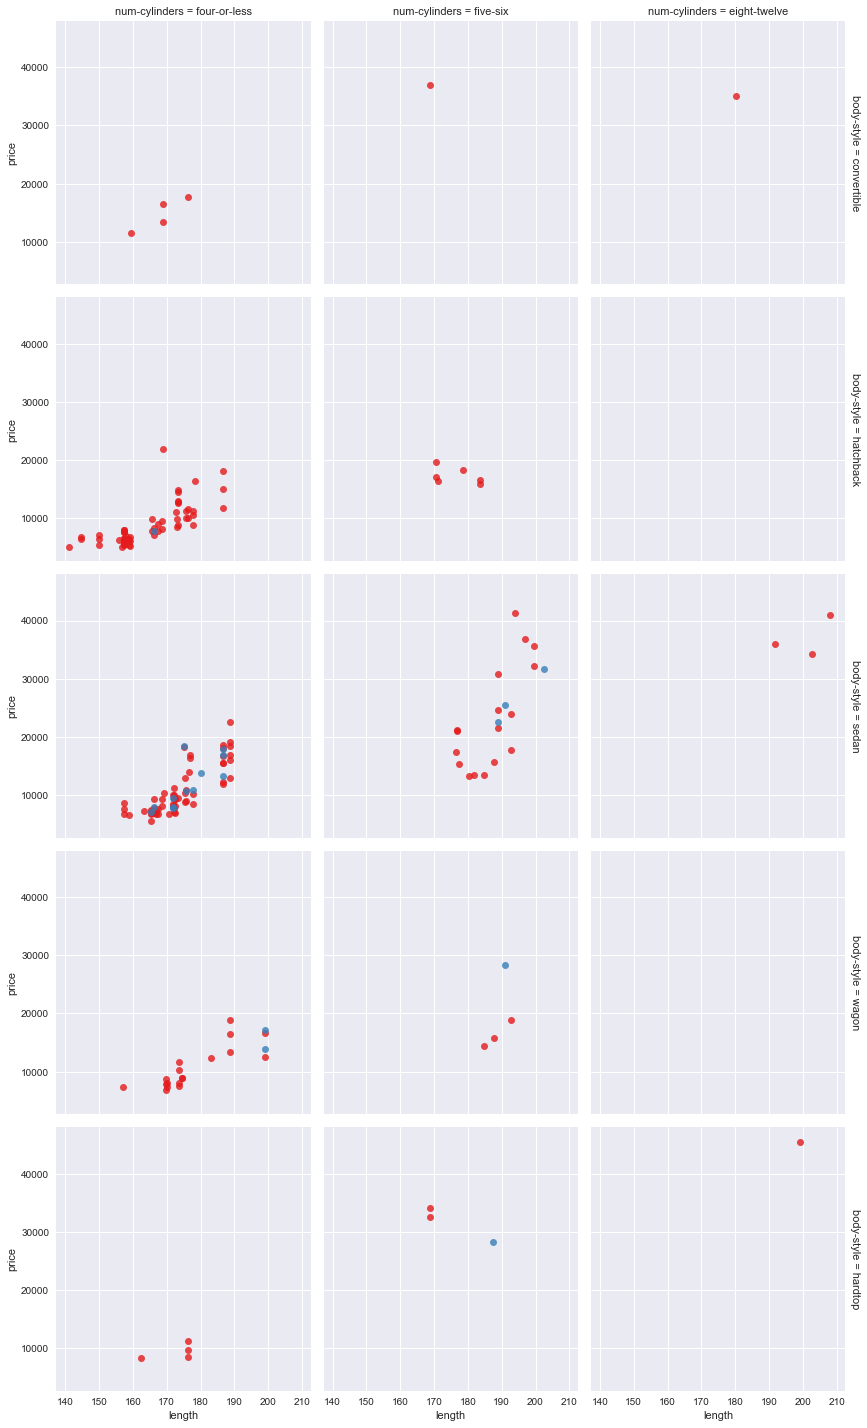

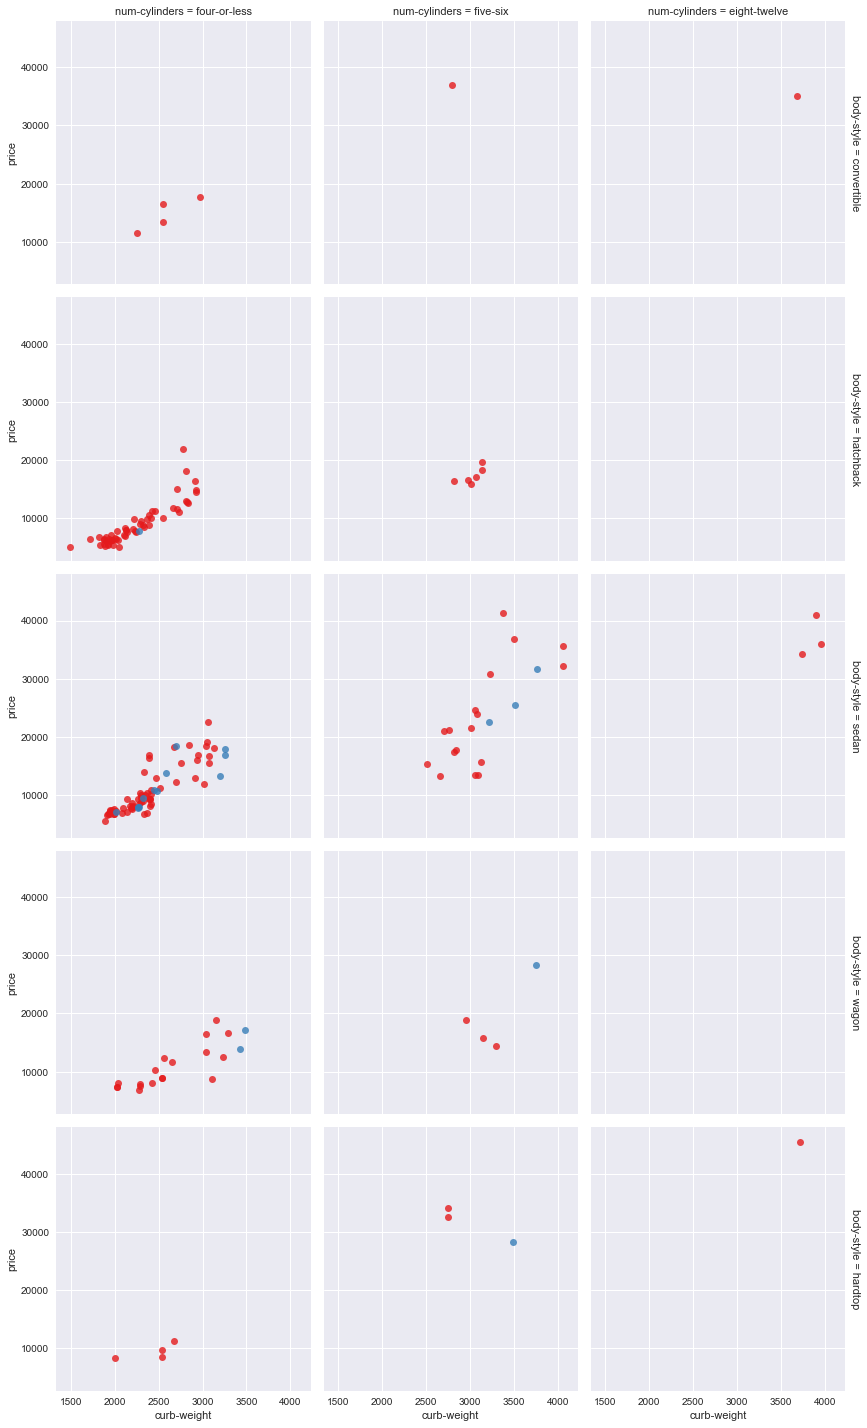

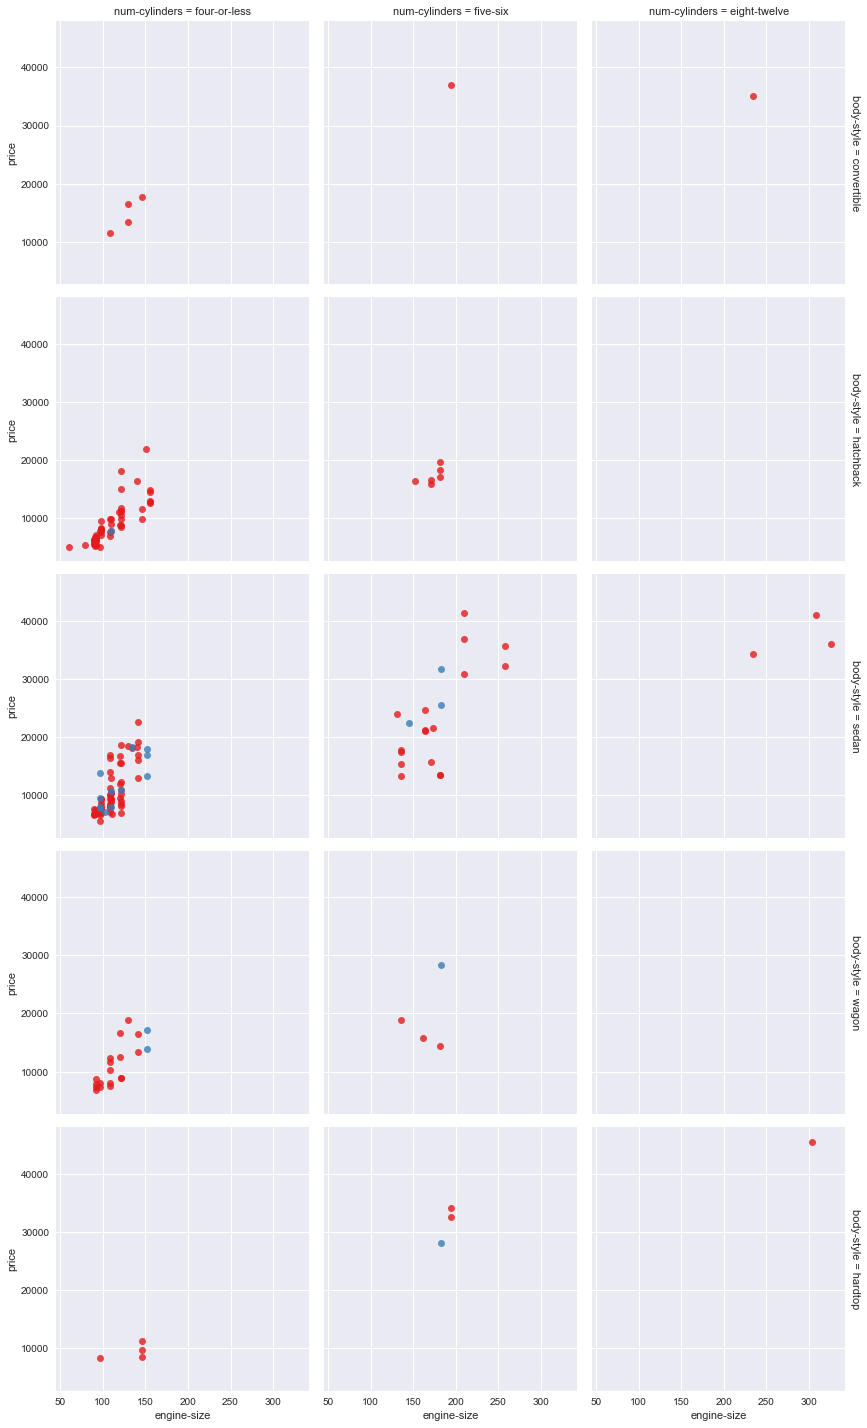

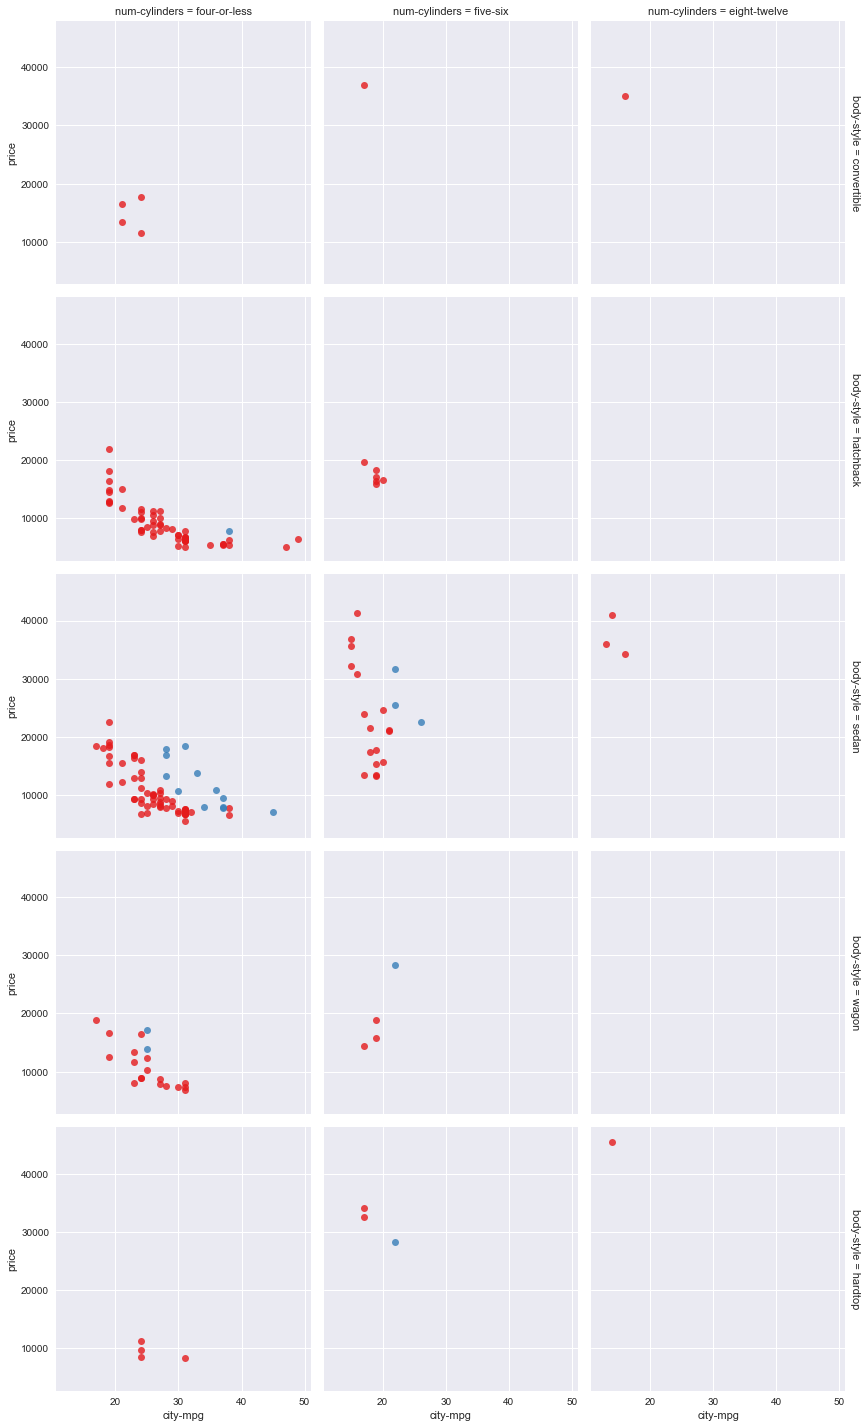

In [7]:
def cond_plot(cols):
    import IPython.html.widgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(auto_price, col="num-cylinders", row = 'body-style', 
                      hue="fuel-type", palette="Set1", size = 4, margin_titles=True)
        g.map(sns.regplot, col, "price", fit_reg = False)

        
## Define columns for making scatter plots
plot_cols3 = ["length",
               "curb-weight",
               "engine-size",
               "city-mpg"]        
cond_plot(plot_cols3)  